## Modelo de regresión lineal de fires.csv

In [38]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Crear dataframe
df_fuego = pd.read_csv("fires-all.csv", sep=",")
df_fuego.drop(columns=["lat", "lng", "latlng_explicit", "time_ctrl", "time_ext", "causa_supuesta", "causa_desc"], inplace=True)

# Mostrar dataframe
print(df_fuego)

                id  superficie       fecha  idcomunidad  idprovincia  \
0       1968290001       14.00  1968-01-01            4           29   
1       1968430003        3.00  1968-01-03            2           43   
2       1968290006        2.00  1968-01-06            4           29   
3       1968120007        8.20  1968-01-07            9           12   
4       1968430016      600.00  1968-01-07            2           43   
...            ...         ...         ...          ...          ...   
292176  2023300134        2.15  2023-10-16            8           30   
292177  2023300129        4.70  2023-10-19            8           30   
292178  2023300128        1.18  2023-11-27            8           30   
292179  2023300130        1.03  2023-12-02            8           30   
292180  2023300141        1.80  2023-12-08            8           30   

        idmunicipio      municipio  causa  muertos  heridos  personal  medios  \
0                 0  INDETERMINADO      2        0    

Una vez limpio el df, ya podremos trabajar más comodamente. Para ello primero vamos a encontrar relaciones

In [37]:
# Buscar correlaciones para más tarde entrenar el modelo
df_fuego.corr(numeric_only=True)

,id,superficie,idcomunidad,idprovincia,idmunicipio,causa,causa_supuesta,causa_desc,muertos,heridos,time_ctrl,time_ext,personal,medios,gastos,perdidas
id,1.000000,-0.027643,0.111442,0.074023,0.242536,-0.099376,-0.464722,-0.134647,0.001143,0.015433,0.159214,0.033351,-0.002281,0.244124,0.037192,0.020034
superficie,-0.027643,1.000000,0.020386,-0.009877,0.023120,-0.018394,0.003545,0.008648,0.167830,0.186601,0.194526,0.301115,0.439172,0.305015,0.153816,0.426223
idcomunidad,0.111442,0.020386,1.000000,-0.084875,0.344693,-0.137316,-0.107860,-0.087970,0.002355,0.008892,0.018814,0.041999,0.059243,0.024487,-0.010634,-0.004994
idprovincia,0.074023,-0.009877,-0.084875,1.000000,-0.028322,0.058694,-0.005620,-0.023380,0.000269,-0.012418,-0.001650,-0.033742,-0.074988,-0.069813,0.009942,0.002236
idmunicipio,0.242536,0.023120,0.344693,-0.028322,1.000000,-0.113088,-0.105906,-0.035812,0.003484,0.016970,0.043232,0.017611,0.068906,0.113401,0.005713,0.018567
causa,-0.099376,-0.018394,-0.137316,0.058694,-0.113088,1.000000,0.043633,-0.188009,-0.007382,-0.018564,-0.030027,-0.024439,-0.074774,-0.099698,-0.015298,-0.008382
causa_supuesta,-0.464722,0.003545,-0.107860,-0.005620,-0.105906,0.043633,1.000000,0.184861,-0.001713,-0.016872,-0.085230,-0.044048,-0.033750,-0.159161,-0.021629,-0.012381
causa_desc,-0.134647,0.008648,-0.087970,-0.023380,-0.035812,-0.188009,0.184861,1.000000,0.000092,0.003476,-0.014725,0.013967,0.023871,0.014485,0.000658,0.000527
muertos,0.001143,0.167830,0.002355,0.000269,0.003484,-0.007382,-0.001713,0.000092,1.000000,0.106164,0.035539,0.059053,0.084680,0.066929,0.043601,0.124211
heridos,0.015433,0.186601,0.008892,-0.012418,0.016970,-0.018564,-0.016872,0.003476,0.106164,1.000000,0.098873,0.119689,0.247234,0.219242,0.062579,0.240349


Text(0.5, 1.0, 'Gráfica entre superficie y gasto')

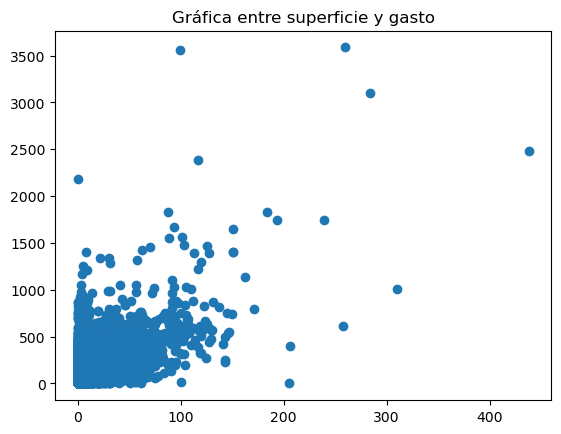

In [ ]:
# Muestra entre superficie y pérdidas
plt.plot(df_fuego["medios"], df_fuego["personal"])
plt.title("Gráfica entre superficie y gasto")

## Proceso de entrenamiento

In [30]:
# Separa las variables independientes (X), de las variables dependientes (Y), las variables de id, 
# y aquellas que sean un número que indiquen otra cosa, se eliminan
x = df_fuego.drop(columns=["id", "superficie", "fecha", "municipio", "causa", "idcomunidad", "idprovincia", "idmunicipio"])
y = df_fuego["superficie"]

# Divide el conjunto de datos en conjunto de entrenamiento y prueba (por ejemplo, 80%, 20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

### Se crea un modelo de entrenamiento, en base al conjunto de datos

In [31]:
# Creación del modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)

#print("Intercepto:", modelo.intercept_)
#print("Coeficientes:", modelo.coef_)
#print("Columnas:", x_train.columns.tolist())

# Muestra la ecuacion del modelo entrenado
df_ecuacion = pd.DataFrame({"Variable" : x_train.columns, "Coeficientes" : modelo.coef_})
print(df_ecuacion)

   Variable  Coeficientes
0   muertos    197.036780
1   heridos    164.493064
2    gastos      0.001602
3  perdidas      0.000399


## Evaluación del modelo
Ahora con los resultados anteriores deberemos de analizar si estos valores son correctos o válidos

In [32]:
# Realiza predicciones sobre el conjunto de prueba
y_pred = modelo.predict(x_test)

# Calcula al menos una métrica de evalaución
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 :", r2)
print("MAE:", mae)
print("MSE:", mse)

R2 : 0.21712953230640653
MAE: 34.30618345413561
MSE: 54697.03569812081
